In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 KB 32.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 KB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 48.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.3/187.3 KB 42.9 MB/s eta 0:00:00
     ━━━━

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 엔비디아 주식 데이터 다운로드
ticker = "NVDA"
data = yf.download(ticker, start="2024-01-01", end="2025-01-01")

/tmp/ipykernel_8971/718557948.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2024-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


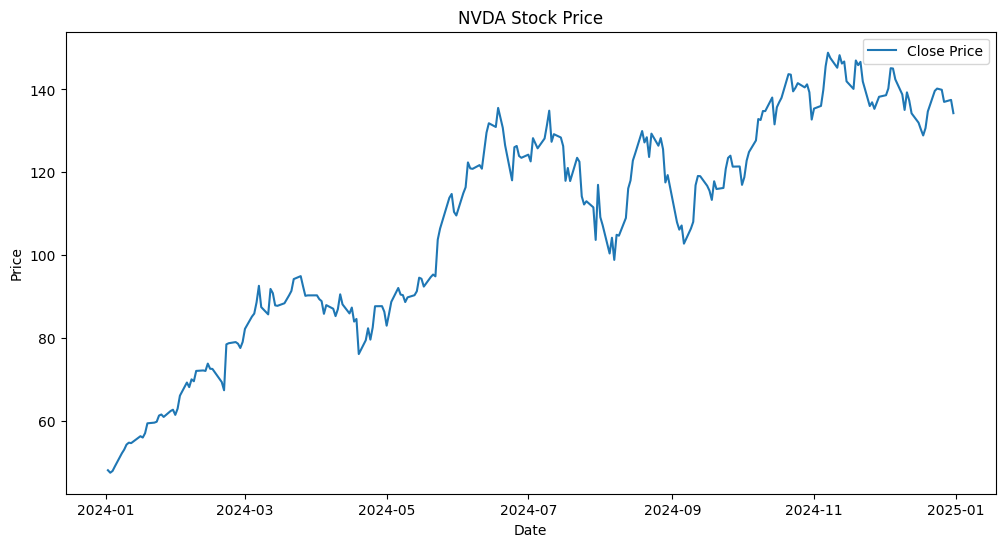

In [10]:
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f"{ticker} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [11]:
data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.146572,49.273070,47.573829,49.222094,411254000
2024-01-03,47.547840,48.162564,47.298950,47.463878,320896000
2024-01-04,47.976650,48.478426,47.486867,47.745750,306535000
2024-01-05,49.075161,49.524962,48.284512,48.440445,415039000
2024-01-08,52.229759,52.251753,49.456995,49.489981,642510000
...,...,...,...,...,...
2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000
2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600


In [12]:
from io import StringIO
csv_buffer = StringIO()
data.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.14657211303711,49.27306967783242,47.57382895982364,49.22209367645226,411254000
2024-01-03,47.5478401184082,48.16256441258292,47.29895033204464,47.46387785018922,320896000
2024-01-04,47.97665023803711,48.478425836176726,47.486866526095774,47.745750186964564,306535000
2024-01-05,49.07516098022461,49.52496157552718,48.284512463803985,48.44044511624241,415039000
2024-01-08,52.229759216308594,52.25175260438739,49.45699467108349,49.48998094020099,642510000
2024-01-09,53.11636734008789,54.30084172784062,51.667011411365344,52.377697569217304,773100000
2024-01-10,54.325828552246094,54.575717375049436,53.46521138550337,53.59215762234406,533796000
2024-01-11,54.79761505126953,55.32138406257686,53.53617913526717,54.974538278058645,596759000
2024-01-12,54.6856575012207,54.94554395725101,54.30582931625337,54.59569739151791,352994000
2024-01-16,56.3569221496582,56.80971977782299,54.8755828754699,54.99353042144443

In [13]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "system",
      "content": "다음은 엔디비아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

### 엔비디아(NVDA) 주가 데이터 분석 보고서

#### 1. 데이터 개요
- **기간**: 2024년 1월 2일 ~ 2024년 12월 31일
- **주요 지표**: 
  - **종가(Close)**: 주식이 거래된 마지막 가격
  - **고가(High)**: 해당 거래일의 최고 가격
  - **저가(Low)**: 해당 거래일의 최저 가격
  - **시가(Open)**: 해당 거래일의 첫 거래 가격
  - **거래량(Volume)**: 해당 거래일에 거래된 주식 수

#### 2. 주가 동향
- **초기 주가**: 2024년 1월 2일, 종가 48.15
- **최고 주가**: 2024년 11월 7일, 종가 148.85
- **최저 주가**: 2024년 4월 19일, 종가 76.17
- **연간 변동성**: 주가는 48.15에서 148.85로 약 209% 상승

#### 3. 주요 트렌드
- **상승세**: 2024년 초반부터 중반까지 주가는 지속적으로 상승세를 보였으며, 특히 5월 23일에는 103.76로 급등.
- **하락세**: 2024년 4월 중순부터 5월 초까지 주가는 하락세를 보였으나, 이후 다시 상승세로 전환.
- **변동성**: 2024년 6월과 7월에 주가가 큰 변동성을 보였으며, 특히 6월 20일에는 130.74에서 140.71로 급등.

#### 4. 거래량 분석
- **거래량 증가**: 2024년 5월 23일, 8,350,650 주가 거래되며 가장 높은 거래량을 기록.
- **거래량 감소**: 2024년 12월에는 거래량이 상대적으로 감소하는 경향을 보임.

#### 5. 결론
- 엔비디아의 주가는 2024년 동안 전반적으로 상승세를 보였으며, 특히 5월과 11월에 두드러진 상승폭을 기록했습니다. 
- 주가는 연초에 비해 약 209% 상승하였으며, 이는 엔비디아의 기술력과 시장의 긍정적인 반응을 반영하는 것으로 보입니다.
- 향후 주가의 지속적인 상승 여부는 시장의 전반적인 경제 상황과 엔비디아의 실적 발표에 따라 달라질 것으로 예상됩